In [67]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time

In [6]:
#Data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

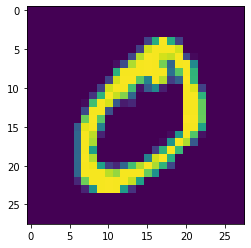

In [22]:
plt.imshow(train_images[1])

In [7]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)

In [8]:
train_images = (train_images-127.5)/127.5

In [10]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(train_images.shape[0]).batch(100)


# Discriminator

In [27]:
#Output probability that the number is 'real' or 'fake'

def discriminator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(7,(3,3), padding="same", input_shape=(28,28,1)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dense(50,activation="relu"))
    model.add(tf.keras.layers.Dense(1))
    return model

In [18]:
model_discriminator = discriminator_model()

In [21]:
model_discriminator(np.random.rand(1,28,28,1).astype("float32"))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.1462142]], dtype=float32)>

In [24]:
discriminator_optimizer = tf.optimizers.Adam(1e-3)

In [11]:
def get_discriminator_loss(real_predictions, fake_predicitons):
    real_predictions = tf.sigmoid(real_predictions)
    fake_predictions - tf.sigmoid(fake_predictions)
    real_loss = tf.loss.binary_crossentropy(tf.ones_like(real_predictions), real_predictions)
    fake_loss = tf.loss.binary_crossentropy(tf.zeros_like(fake_predictions), fake_predictions)
    return fake_loss + real_loss

# Generator

In [9]:
import tensorflow as tf
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(7*7*256, input_shape = (100,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Reshape((7,7,256)))
    model.add(tf.keras.layers.Conv2DTranspose(128,(3,3), padding = "same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2DTranspose(64,(3,3), strides = (2,2), padding = "same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2DTranspose(1, (3,3), strides = (2,2), padding = "same"))
    return model

In [14]:
generator = make_generator_model()

In [57]:
generator_optimizer = tf.optimizers.Adam(1e-4)
#discriminator_optimizer = tf.optimizers.Adam(1e-4)

In [17]:
def get_generator_loss(fake_predictions):
    fake_predictions = tf.sigmoid(fake_predictions)
    fake_loss = tf.loss.binary_crossentropy(tf.ones_like(fake_predictions), fake_predictions)
    return fake_loss

# Training

In [18]:
def train(dataset, epochs):
    for _ in range(epochs):
        for images in dataset:
            images = tf.cast(images, tf.dtypes.float32)
            train_step(images)

In [58]:
def train_step(images):
    fake_image_noise = np.random.randn(256, 100).astype("float32")
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(fake_image_noise)
        real_output = model_discriminator(images)
        fake_output = model_discriminator(generated_images)
        
        gen_loss = get_generator_loss(fake_output)
        disc_loss = get_discriminator_loss(real_output, fake_output)
        
        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, model_discriminator.trainable_variables)
  
        #generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables)
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, model_discriminator.trainable_variables))
                                      
        print("generator loss: ", np.mean(gen_loss))
        print("discriminator loss: ", np.mean(disc_loss))

In [65]:
train(train_data,2)

NameError: name 'train_data' is not defined

In [69]:
plt.imshow(generator(np.random.rand(1,100).reshape(28,28)))

ValueError: cannot reshape array of size 100 into shape (28,28)